## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [3]:
data1=pd.read_csv("broadband-penetration-by-country.csv")
data2=pd.read_csv("mobile-cellular-subscriptions-per-100-people.csv")
data3=pd.read_csv("share-of-individuals-using-the-internet.csv")
data4=pd.read_csv("number-of-internet-users-by-country.csv")

## Concatinating the all 4  datasets

In [4]:
final=pd.concat([data1,data2,data3,data4], axis=0)

## Statistics 

In [5]:
final.describe()

,Year,Fixed broadband subscriptions (per 100 people),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population),Number of internet users (OWID based on WB & UN)
count,27725.000000,4175.000000,11895.000000,7119.000000,4.536000e+03
mean,2001.212047,9.318944,30.839729,20.958204,1.363695e+07
std,12.568973,11.919007,47.433838,27.437190,1.233676e+08
min,1960.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1994.000000,0.283430,0.000000,0.162518,2.507000e+04
50%,2004.000000,3.232097,0.365290,6.074087,2.833990e+05
75%,2011.000000,15.187406,58.234904,35.864362,2.916425e+06
max,2019.000000,62.280620,345.324522,99.701504,3.419398e+09


## Checking the nulls 

In [6]:
final.isna().sum()

Entity                                                  0
Code                                                 4411
Year                                                    0
Fixed broadband subscriptions (per 100 people)      23550
Mobile cellular subscriptions (per 100 people)      15830
Individuals using the Internet (% of population)    20606
Number of internet users (OWID based on WB & UN)    23189
dtype: int64

## Filling the nulls with zero

In [7]:
final["Fixed broadband subscriptions (per 100 people)"]=final["Fixed broadband subscriptions (per 100 people)"].fillna(0)

In [8]:
final["Mobile cellular subscriptions (per 100 people)"]=final["Mobile cellular subscriptions (per 100 people)"].fillna(0)

In [9]:
final["Individuals using the Internet (% of population)"]=final["Individuals using the Internet (% of population)"].fillna(0)

In [10]:
final["Number of internet users (OWID based on WB & UN)"]=final["Number of internet users (OWID based on WB & UN)"].fillna(0)

## Checking the data types 

In [11]:
final.dtypes

Entity                                               object
Code                                                 object
Year                                                  int64
Fixed broadband subscriptions (per 100 people)      float64
Mobile cellular subscriptions (per 100 people)      float64
Individuals using the Internet (% of population)    float64
Number of internet users (OWID based on WB & UN)    float64
dtype: object

## droping the nulls 

In [12]:
final=final.dropna()

In [13]:
final.isna().sum()

Entity                                              0
Code                                                0
Year                                                0
Fixed broadband subscriptions (per 100 people)      0
Mobile cellular subscriptions (per 100 people)      0
Individuals using the Internet (% of population)    0
Number of internet users (OWID based on WB & UN)    0
dtype: int64

## Renaming the columns

In [14]:
final.rename(columns = {'Entity':'Country','Fixed broadband subscriptions (per 100 people)':'Fixed_broadband_subscriptions',
                        'Mobile cellular subscriptions (per 100 people)':'Mobile_cellular_subscriptions'
                        ,'Individuals using the Internet (% of population)': 'Individuals_using_the_Internet',
                        'Number of internet users (OWID based on WB & UN)':'number_of_internet_users'},inplace = True)
                    

In [15]:
final.tail()

,Country,Code,Year,Fixed_broadband_subscriptions,Mobile_cellular_subscriptions,Individuals_using_the_Internet,number_of_internet_users
4531,Zimbabwe,ZWE,2012,0.0,0.0,0.0,1765299.0
4532,Zimbabwe,ZWE,2013,0.0,0.0,0.0,2333448.0
4533,Zimbabwe,ZWE,2014,0.0,0.0,0.0,2522081.0
4534,Zimbabwe,ZWE,2015,0.0,0.0,0.0,3588237.0
4535,Zimbabwe,ZWE,2016,0.0,0.0,0.0,3733962.0


## DATA VISUALIZATION

### TOP 10 NUMBER OF INTERNET USERS IN EACH COUNTRY

#### PIVOT TABLE

In [16]:
number_of_internet_users_by_Country = pd.pivot_table(final, index="Country", values="number_of_internet_users",aggfunc="count").sort_values(by="number_of_internet_users",ascending=False).head(10)
number_of_internet_users_by_Country

,number_of_internet_users
Country,
Belgium,128
France,128
Hong Kong,128
Austria,127
Japan,127
Portugal,127
Mexico,126
Denmark,126
South Korea,126


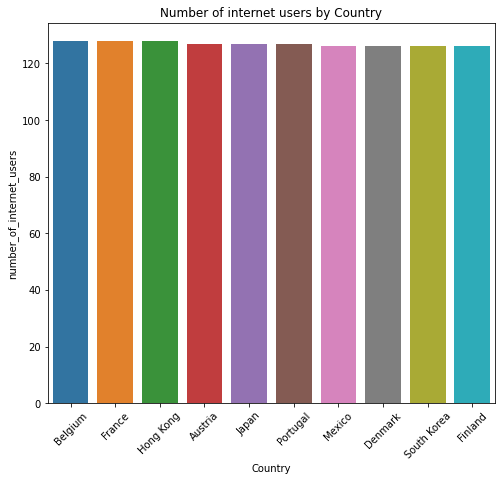

In [17]:
plt.figure(figsize=(8,7))
plt.title("Number of internet users by Country")
sns.barplot(x=number_of_internet_users_by_Country.index,y= number_of_internet_users_by_Country["number_of_internet_users"])
plt.xticks(rotation=45)
plt.show()

##  TOP 10 Fixed_broadband_subscriptions per 100 people From 2010 - 2019

#### PIVOT TABLE

In [18]:
Fixed_broadband_subscriptions_by_year= pd.pivot_table(final, index="Year", values="Fixed_broadband_subscriptions",aggfunc="count").sort_values(by="Year",ascending=False).head(10)
Fixed_broadband_subscriptions_by_year

,Fixed_broadband_subscriptions
Year,
2019,402
2018,451
2017,677
2016,794
2015,804
2014,799
2013,801
2012,799
2011,793


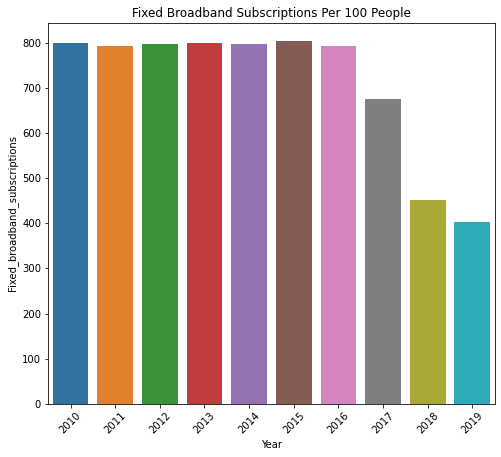

In [19]:
plt.figure(figsize=(8,7))
plt.title("Fixed Broadband Subscriptions Per 100 People")
sns.barplot(x=Fixed_broadband_subscriptions_by_year.index,y= Fixed_broadband_subscriptions_by_year["Fixed_broadband_subscriptions"])
plt.xticks(rotation=45)
plt.show()

##  TOP 10 Mobile cellular Subscriptions per 100 people From 2007 to 2015

#### PIVOT TABLE

In [20]:
Mobile_cellular_subscriptions= pd.pivot_table(final, index="Year", values="Mobile_cellular_subscriptions",aggfunc="count").sort_values(by="Mobile_cellular_subscriptions",ascending=False).head(10)
Mobile_cellular_subscriptions

,Mobile_cellular_subscriptions
Year,
2015,804
2013,801
2010,801
2012,799
2014,799
2016,794
2011,793
2009,791
2008,787


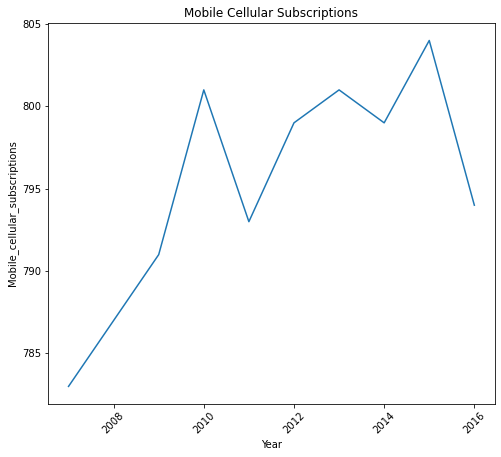

In [21]:
plt.figure(figsize=(8,7))
plt.title("Mobile Cellular Subscriptions")
sns.lineplot(x=Mobile_cellular_subscriptions.index,y= Mobile_cellular_subscriptions["Mobile_cellular_subscriptions"])
plt.xticks(rotation=45)
plt.show()

##  Sum of Mobile cellular subscriptions  For  Top  10 Countries

#### PIVOT TABLE

In [22]:
Mobile_cellular_subscriptions_1= pd.pivot_table(final, index="Country", values="Mobile_cellular_subscriptions",aggfunc="sum").sort_values(by="Mobile_cellular_subscriptions",ascending=False).head(10)
Mobile_cellular_subscriptions_1

,Mobile_cellular_subscriptions
Country,
Hong Kong,3891.188234
Macao,3845.212784
United Arab Emirates,2819.279494
Italy,2806.891147
Finland,2711.922040
Luxembourg,2711.476689
Singapore,2644.575012
Austria,2562.081086
Lithuania,2554.457721


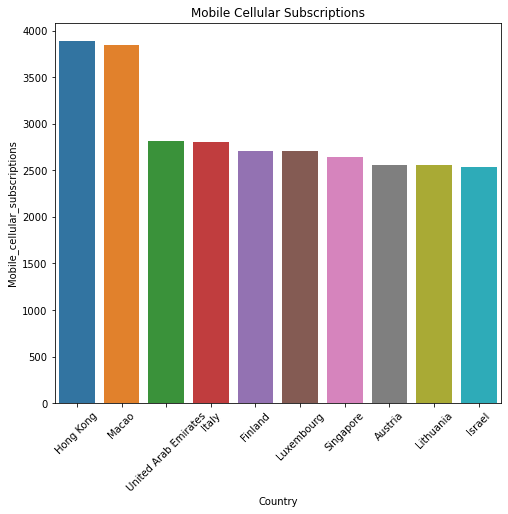

In [23]:
plt.figure(figsize=(8,7))
plt.title("Mobile Cellular Subscriptions")
sns.barplot(x=Mobile_cellular_subscriptions_1.index,y= Mobile_cellular_subscriptions_1["Mobile_cellular_subscriptions"])
plt.xticks(rotation=45)
plt.show()

## Share of the population using the internet (% of population)


#### PIVOT TABLE

In [24]:
# Individuals_using_the_Internet= pd.pivot_table(final, index="Year", values="Individuals_using_the_Internet",aggfunc="sum").sort_values(by="Individuals_using_the_Internet",ascending=False).head(10)
# Individuals_using_the_Internet

In [25]:
Individuals_using_the_Internet=final.groupby(["Year"]).agg({"Individuals_using_the_Internet" : "sum"})[["Individuals_using_the_Internet"]].apply(lambda x: 100*x/x.sum()).sort_values(by="Individuals_using_the_Internet", ascending=False).head(10)

In [26]:
Individuals_using_the_Internet

,Individuals_using_the_Internet
Year,
2017,8.792639
2016,8.245493
2015,7.783266
2014,7.266454
2013,6.842276
2012,6.444189
2011,6.052053
2010,5.518005
2018,5.058409


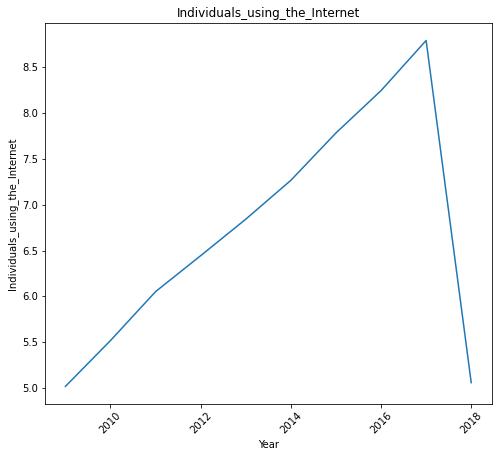

In [27]:
plt.figure(figsize=(8,7))
plt.title("Individuals_using_the_Internet")
sns.lineplot(x=Individuals_using_the_Internet.index,y= Individuals_using_the_Internet["Individuals_using_the_Internet"])
plt.xticks(rotation=45)
plt.show()

## CHANGE IN PERCENTAGE FOR INTERNET USAGE FROM 2000 TO 2019 

In [28]:
final_1= final[final['Year'].isin([2000,2019])]

In [29]:
final_1

,Country,Code,Year,Fixed_broadband_subscriptions,Mobile_cellular_subscriptions,Individuals_using_the_Internet,number_of_internet_users
14,Afghanistan,AFG,2019,0.051741,0.0,0.0,0.0
56,Albania,ALB,2019,15.140735,0.0,0.0,0.0
73,Algeria,DZA,2019,8.321684,0.0,0.0,0.0
91,Andorra,AND,2019,47.131264,0.0,0.0,0.0
105,Angola,AGO,2019,0.374130,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4424,Vietnam,VNM,2000,0.000000,0.0,0.0,204125.0
4449,World,OWID_WRL,2000,0.000000,0.0,0.0,414371966.0
4471,Yemen,YEM,2000,0.000000,0.0,0.0,14747.0
4495,Zambia,ZMB,2000,0.000000,0.0,0.0,20122.0


#### PIVOT TABLE

In [30]:
Individuals_using_the_Internet_1= pd.pivot_table(final_1, index="Year", values="Individuals_using_the_Internet",aggfunc="count").sort_values(by="Year",ascending=False)
Individuals_using_the_Internet_1

,Individuals_using_the_Internet
Year,
2019,402
2000,630


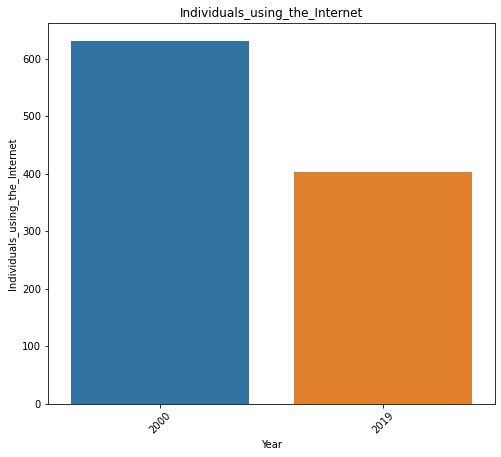

In [31]:
plt.figure(figsize=(8,7))
plt.title("Individuals_using_the_Internet")
sns.barplot(x=Individuals_using_the_Internet_1.index,y= Individuals_using_the_Internet_1["Individuals_using_the_Internet"])
plt.xticks(rotation=45)
plt.show()

In [35]:
final.to_csv('new_file.csv')